In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
cdata = df.copy()
cdata.isnull().sum()
# Check for missing values
missing_values = cdata[cdata.isna().any(axis=1)]

# Display the rows where missing values exist
print(missing_values)

cdata.dtypes

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
178  Gentoo     Biscoe            44.5           14.3              216.0   
218  Gentoo     Biscoe            46.2           14.4              214.0   
256  Gentoo     Biscoe            47.3           13.8              216.0   
268  Gentoo     Biscoe            44.5           15.7              217.0   
271  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  year  
3            NaN  NaN  2007  
8         3475.0  NaN  2007

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [5]:
#filling missing values with mean from each column
cdata['bill_length_mm'].fillna(cdata['bill_length_mm'].mean(),inplace=True)
cdata['bill_depth_mm'].fillna(cdata['bill_depth_mm'].mean(),inplace=True)
cdata['flipper_length_mm'].fillna(cdata['flipper_length_mm'].mean(),inplace=True)
cdata['body_mass_g'].fillna(cdata['body_mass_g'].mean(),inplace=True)

# Define choices
choices = ['male', 'female']

# Get indices of missing values in 'sex' column
missing_indices = cdata[cdata['sex'].isnull()].index

# Fill missing values with random choices
cdata.loc[missing_indices, 'sex'] = np.random.choice(choices, size=len(missing_indices))

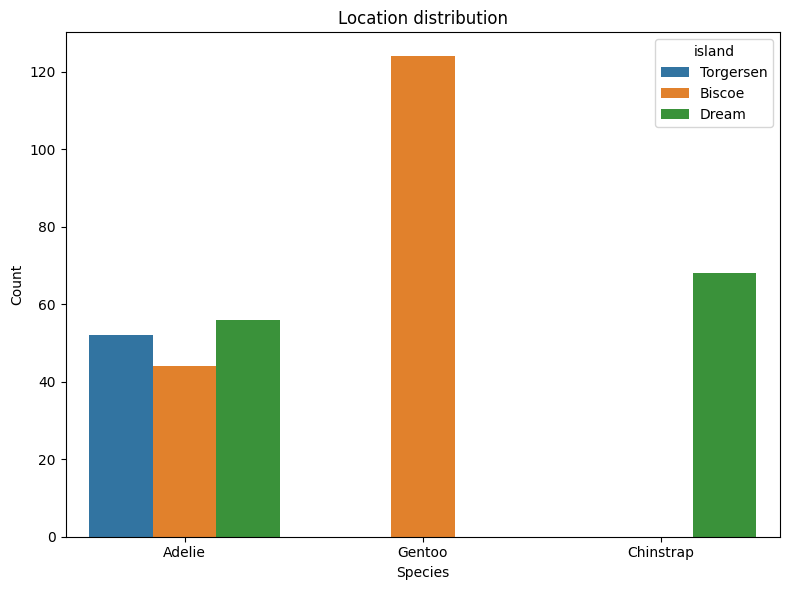

In [6]:
# Species Distribution: Adjusting the size of the plot
plt.figure(figsize=(8, 6))
sns.countplot(data=cdata, x='species', hue='island')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title("Location distribution")

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

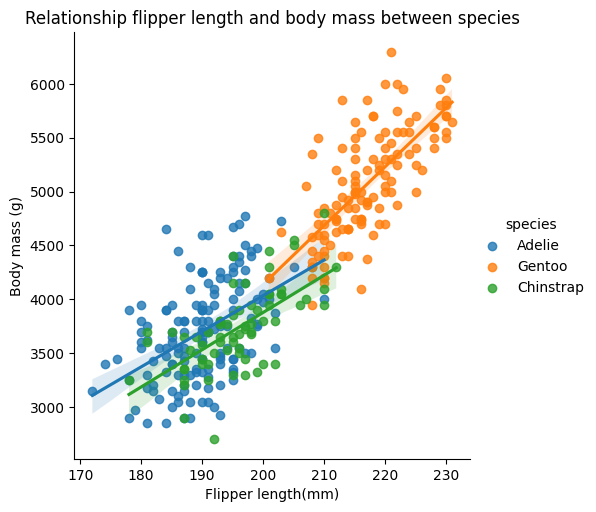

In [7]:
#Flipper Length & Body Mass
# Sample data
sns.lmplot(data=cdata, x='flipper_length_mm', y='body_mass_g', hue='species')

# Adding plot title and labels
plt.title('Relationship flipper length and body mass between species')
plt.xlabel('Flipper length(mm)')
plt.ylabel('Body mass (g)')

# Displaying the plot
plt.show()

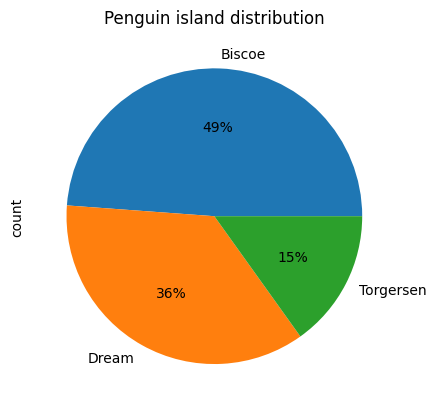

In [8]:
#Island distribution
cdata['island'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Penguin island distribution')
plt.show()

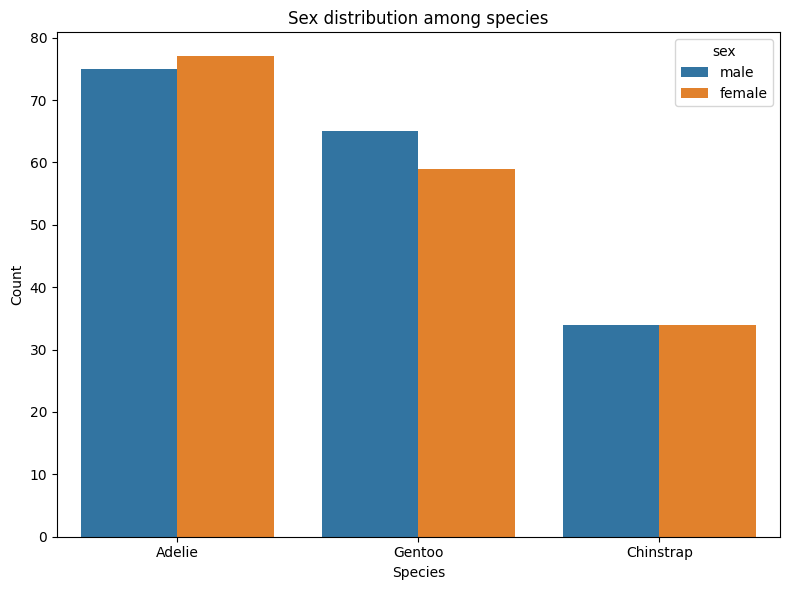

In [9]:
#Sex distribution among species#
plt.figure(figsize=(8, 6))
sns.countplot(data=cdata, x='species', hue='sex')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title("Sex distribution among species")

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

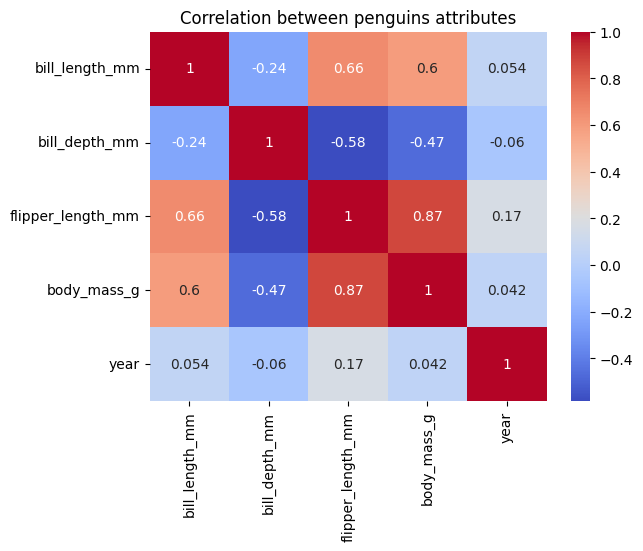

In [16]:
numeric_cdata = cdata.select_dtypes(include=['float', 'int'])
correlation_matrix = numeric_cdata.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between penguins attributes")
plt.show()


<ipython-input-13-e41cd0c520f7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=cdata, x='species', y='flipper_length_mm', palette=species_palette)
<ipython-input-13-e41cd0c520f7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 1], data=cdata, x='species', y='body_mass_g', palette=species_palette)
<ipython-input-13-e41cd0c520f7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1, 0], data=cdata, x='species', y='bill_length_mm', palette=species_palette)
<ipython-input-13-e41cd0c520f7>:12: FutureWarni

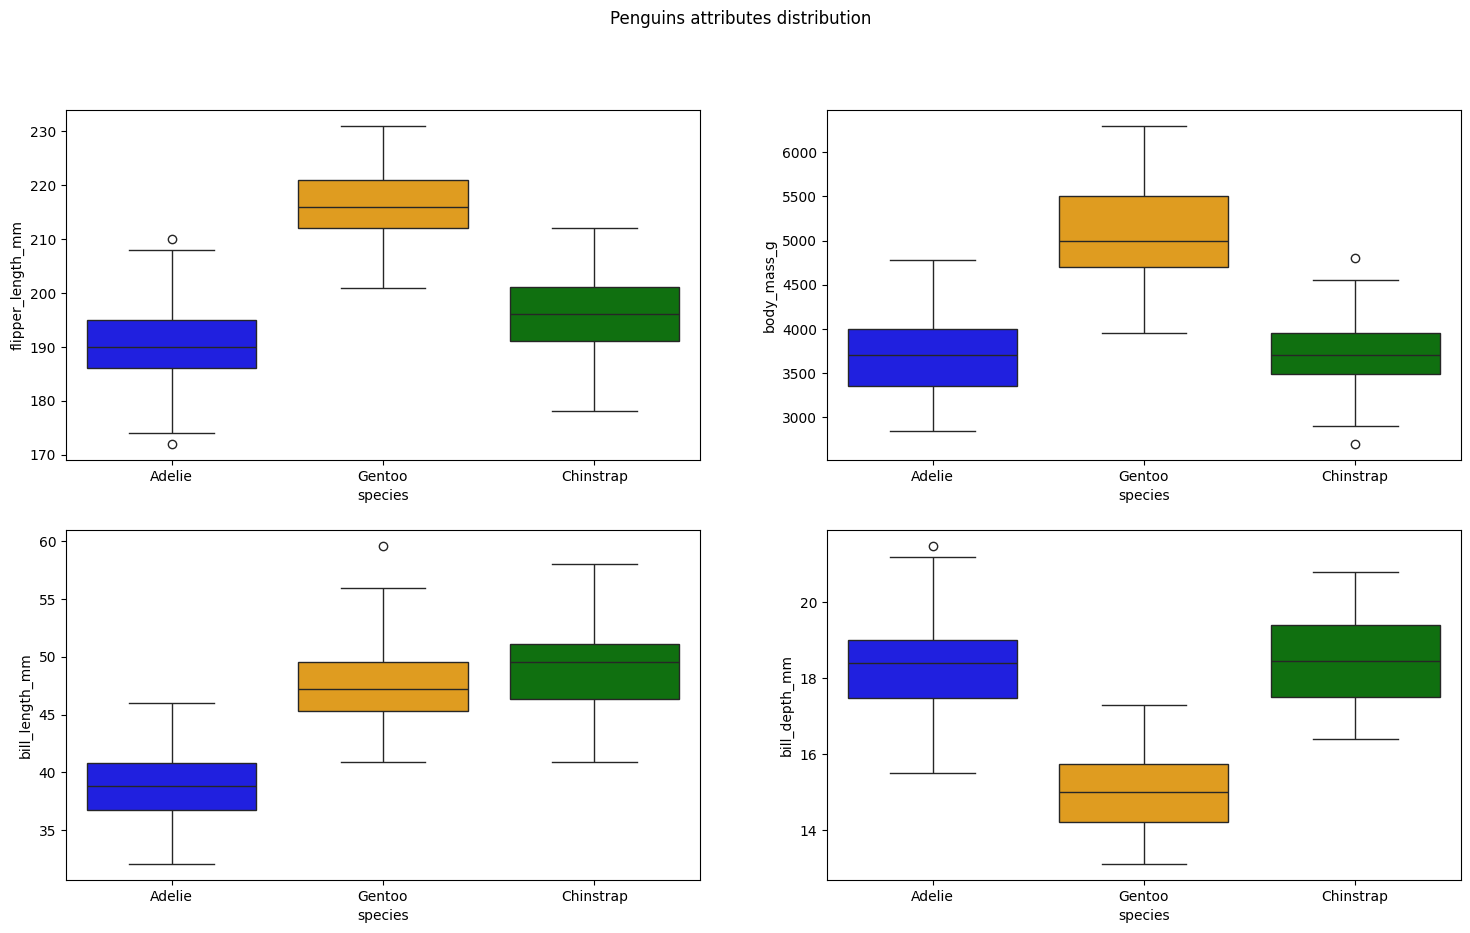

In [13]:
#BoxPlot for Measurements
species_palette = {'Adelie': 'blue', 'Chinstrap': 'green', 'Gentoo': 'orange'}

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Penguins attributes distribution')

# Plot boxplots for each attribute with species-specific colors
sns.boxplot(ax=axes[0, 0], data=cdata, x='species', y='flipper_length_mm', palette=species_palette)
sns.boxplot(ax=axes[0, 1], data=cdata, x='species', y='body_mass_g', palette=species_palette)
sns.boxplot(ax=axes[1, 0], data=cdata, x='species', y='bill_length_mm', palette=species_palette)
sns.boxplot(ax=axes[1, 1], data=cdata, x='species', y='bill_depth_mm', palette=species_palette)

plt.show()


Text(0.5, 1.0, 'Histogram of Flipper Length (mm)')

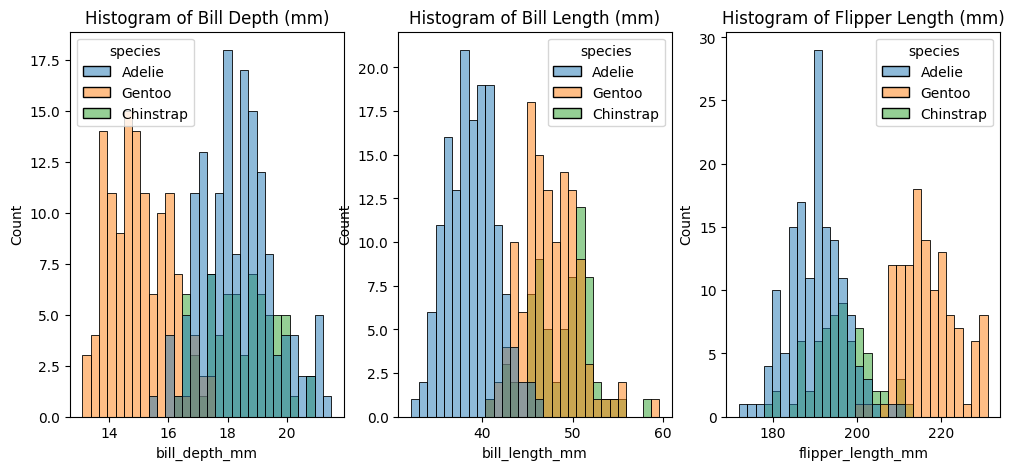

In [14]:
#Histogram of Measurements
# Create subplots for bill_depth_mm and bill_length_mm
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Plot histograms with species as hue
sns.histplot(data=cdata, x='bill_depth_mm', hue='species', bins=30, alpha=0.5, ax=axes[0])
axes[0].set_title("Histogram of Bill Depth (mm)")
sns.histplot(data=cdata, x='bill_length_mm', hue='species', bins=30, alpha=0.5, ax=axes[1])
axes[1].set_title("Histogram of Bill Length (mm)")
sns.histplot(data=cdata, x='flipper_length_mm', hue='species', bins=30, alpha=0.5, ax=axes[2])
axes[2].set_title("Histogram of Flipper Length (mm)")